# Importing Libraries

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
from sklearn.cluster import DBSCAN

## Generating sets of Random Points 

In [11]:
def generate_points(m, n):
    set_a = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(m)]
    set_b = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(n)]
    return set_a, set_b


## Simple comparision

In [12]:
def find_close_pairs(set_a, set_b, epsilon):
    close_pairs = []
    for a_point in set_a:
        for b_point in set_b:
            distance = math.sqrt((a_point[0] - b_point[0])**2 + (a_point[1] - b_point[1])**2)
            if distance < epsilon:
                close_pairs.append((a_point, b_point))
    return close_pairs


### Implementing DBScan which is an optimal way of finding points within a specific distance, 
### It improves the time complexity of the previous brute force by avoiding unnecessary points that lie outside of the cluster

In [31]:
def find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples):
    db_a = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_a)
    labels_a = db_a.labels_
    
    db_b = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_b)
    labels_b = db_b.labels_
    
    close_pairs = []
    
    for cluster_id in np.unique(labels_a):
        if cluster_id != -1: # Ignore noise points
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id]
            close_pairs.extend(find_close_pairs(cluster_a, cluster_a, epsilon))
    
   
    for cluster_id_a in np.unique(labels_a):
        if cluster_id_a != -1:
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id_a]
            for cluster_id_b in np.unique(labels_b):
                if cluster_id_b != -1:
                    cluster_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == cluster_id_b]
                    close_pairs.extend(find_close_pairs(cluster_a, cluster_b, epsilon))
    
    noise_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == -1]
    noise_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == -1]
    close_pairs.extend(find_close_pairs(noise_a, set_b, epsilon))
    close_pairs.extend(find_close_pairs(set_a, noise_b, epsilon))
    
    return close_pairs, labels_a, labels_b


# We plot graph for each cluster formed

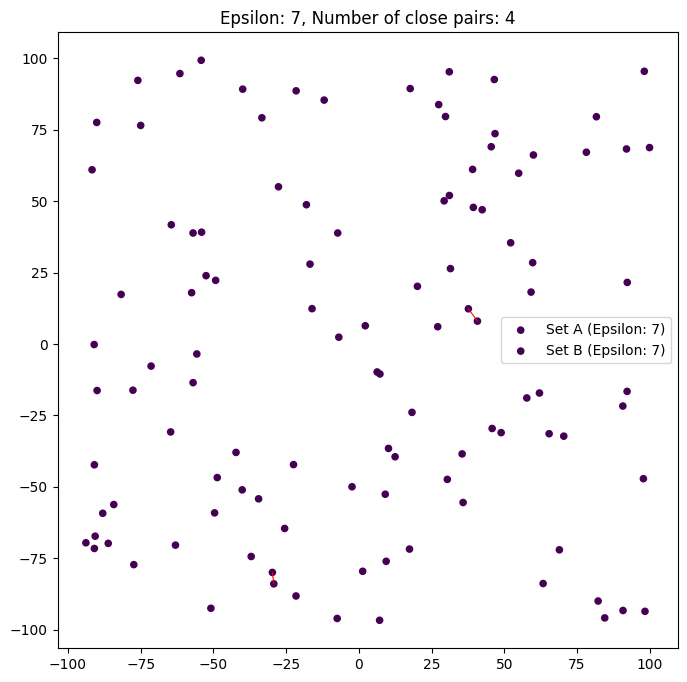

Epsilon: 7, Number of close pairs: 4
Pair: (40.75211391556414, 8.002736885235606) <--> (37.64852995767018, 12.316225536348014)
Pair: (-29.235206346087054, -83.90572164994006) <--> (-29.739688754887055, -79.90825907313521)
Pair: (40.75211391556414, 8.002736885235606) <--> (37.64852995767018, 12.316225536348014)
Pair: (-29.235206346087054, -83.90572164994006) <--> (-29.739688754887055, -79.90825907313521)


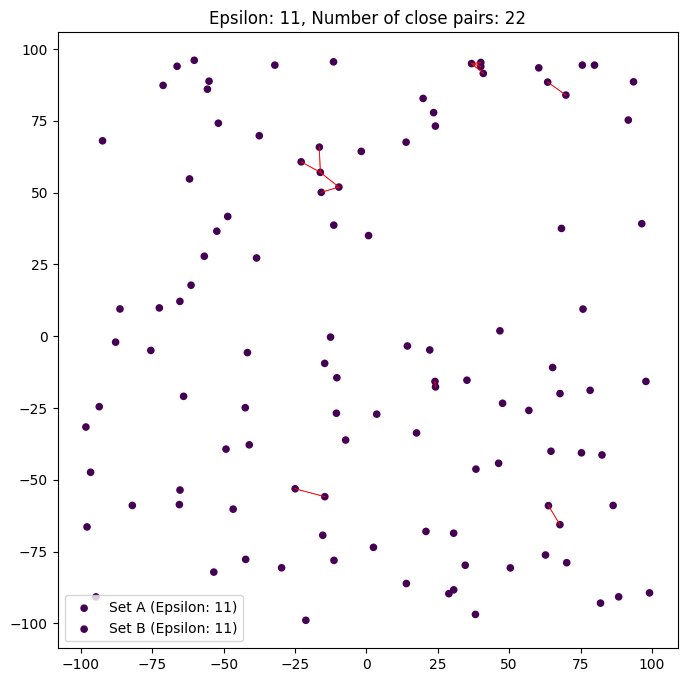

Epsilon: 11, Number of close pairs: 22
Pair: (-22.8398035171421, 60.72667213289009) <--> (-16.130429697642, 57.06231606093573)
Pair: (-24.949765808354158, -53.122733133544095) <--> (-14.55793604430005, -55.87893861378201)
Pair: (63.75999849277599, -59.00859556701812) <--> (67.78429064861339, -65.61941404380589)
Pair: (63.489497949674615, 88.47625166234997) <--> (69.8767796049973, 83.97035910496521)
Pair: (-9.61725642766909, 51.9283306617599) <--> (-15.801377675325938, 50.102209965002174)
Pair: (-9.61725642766909, 51.9283306617599) <--> (-16.130429697642, 57.06231606093573)
Pair: (40.93844179318819, 91.51043284933493) <--> (36.83606128224275, 94.93321732775931)
Pair: (40.0767023593379, 95.32040566731789) <--> (36.83606128224275, 94.93321732775931)
Pair: (40.07535213940125, 93.94687517139218) <--> (36.83606128224275, 94.93321732775931)
Pair: (-16.470541089123046, 65.84497714393021) <--> (-16.130429697642, 57.06231606093573)
Pair: (24.209981367269535, -17.65855516031283) <--> (24.02471427

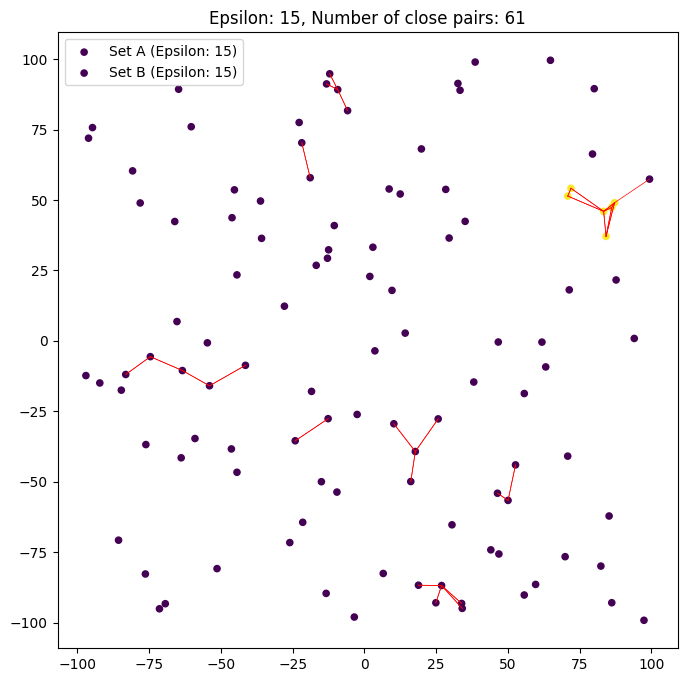

Epsilon: 15, Number of close pairs: 61
Pair: (86.18558739750765, 47.32305275000823) <--> (86.18558739750765, 47.32305275000823)
Pair: (86.18558739750765, 47.32305275000823) <--> (87.16973226345976, 49.00916920438283)
Pair: (86.18558739750765, 47.32305275000823) <--> (83.372518781396, 45.957306945108655)
Pair: (86.18558739750765, 47.32305275000823) <--> (84.20937420517646, 37.06545794380992)
Pair: (87.16973226345976, 49.00916920438283) <--> (86.18558739750765, 47.32305275000823)
Pair: (87.16973226345976, 49.00916920438283) <--> (87.16973226345976, 49.00916920438283)
Pair: (87.16973226345976, 49.00916920438283) <--> (83.372518781396, 45.957306945108655)
Pair: (87.16973226345976, 49.00916920438283) <--> (84.20937420517646, 37.06545794380992)
Pair: (71.99174368693161, 54.13931161033105) <--> (71.99174368693161, 54.13931161033105)
Pair: (71.99174368693161, 54.13931161033105) <--> (83.372518781396, 45.957306945108655)
Pair: (71.99174368693161, 54.13931161033105) <--> (70.8777011244459, 51.37

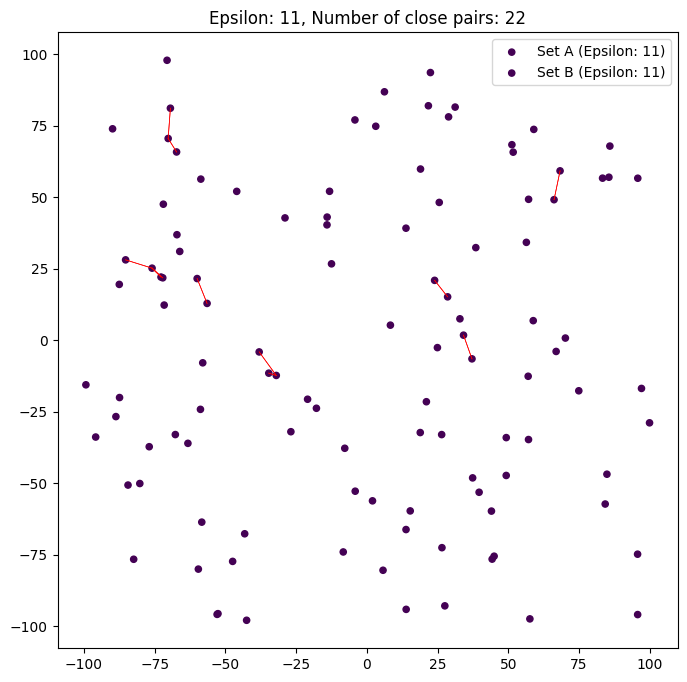

Epsilon: 11, Number of close pairs: 22
Pair: (-72.74647074034843, 22.08778742961502) <--> (-75.90195942129291, 25.198910550409863)
Pair: (34.197037394856466, 1.75807332881881) <--> (37.185694162486215, -6.52833314596792)
Pair: (-56.45696460346363, 12.869455736621148) <--> (-59.97108498289128, 21.55950110059186)
Pair: (-67.23908867587534, 65.84112077098584) <--> (-70.21678591812754, 70.55648471717265)
Pair: (-72.12128591860943, 21.818864641433862) <--> (-75.90195942129291, 25.198910550409863)
Pair: (-85.25753985887991, 28.09845597116322) <--> (-75.90195942129291, 25.198910550409863)
Pair: (28.576756959602278, 15.162949435982085) <--> (23.981219489250606, 20.933748096316535)
Pair: (66.19700750714165, 49.14581903672945) <--> (68.32696517636444, 59.23604882048775)
Pair: (-31.99372678745027, -12.329644487767965) <--> (-38.04186790252477, -4.103464918417529)
Pair: (-31.99372678745027, -12.329644487767965) <--> (-34.64341034049383, -11.532154328734464)
Pair: (-69.42436426950295, 81.1478053018

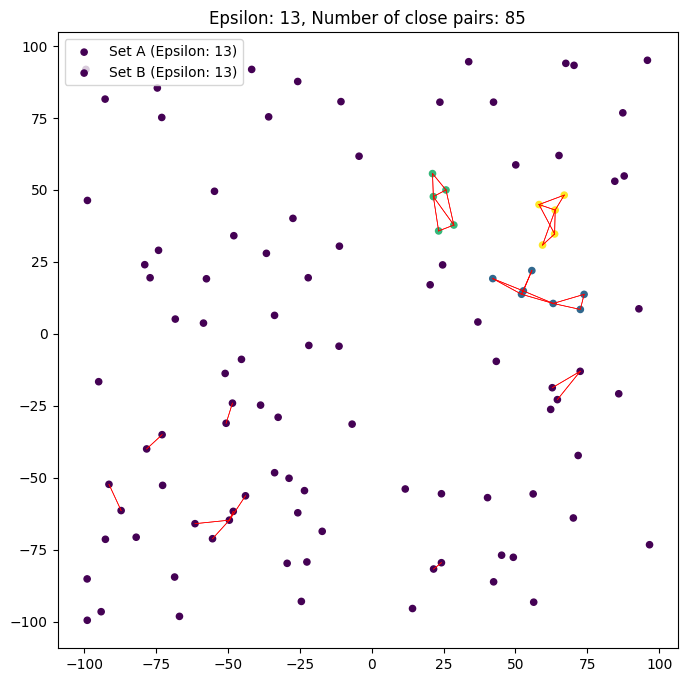

Epsilon: 13, Number of close pairs: 85
Pair: (55.698605930818275, 21.98607453372037) <--> (55.698605930818275, 21.98607453372037)
Pair: (55.698605930818275, 21.98607453372037) <--> (52.10810809297547, 13.770296011671405)
Pair: (55.698605930818275, 21.98607453372037) <--> (52.74733710250601, 14.920046418722222)
Pair: (42.1103133364453, 19.203694175675096) <--> (42.1103133364453, 19.203694175675096)
Pair: (42.1103133364453, 19.203694175675096) <--> (52.10810809297547, 13.770296011671405)
Pair: (42.1103133364453, 19.203694175675096) <--> (52.74733710250601, 14.920046418722222)
Pair: (52.10810809297547, 13.770296011671405) <--> (55.698605930818275, 21.98607453372037)
Pair: (52.10810809297547, 13.770296011671405) <--> (42.1103133364453, 19.203694175675096)
Pair: (52.10810809297547, 13.770296011671405) <--> (52.10810809297547, 13.770296011671405)
Pair: (52.10810809297547, 13.770296011671405) <--> (52.74733710250601, 14.920046418722222)
Pair: (52.10810809297547, 13.770296011671405) <--> (63.1

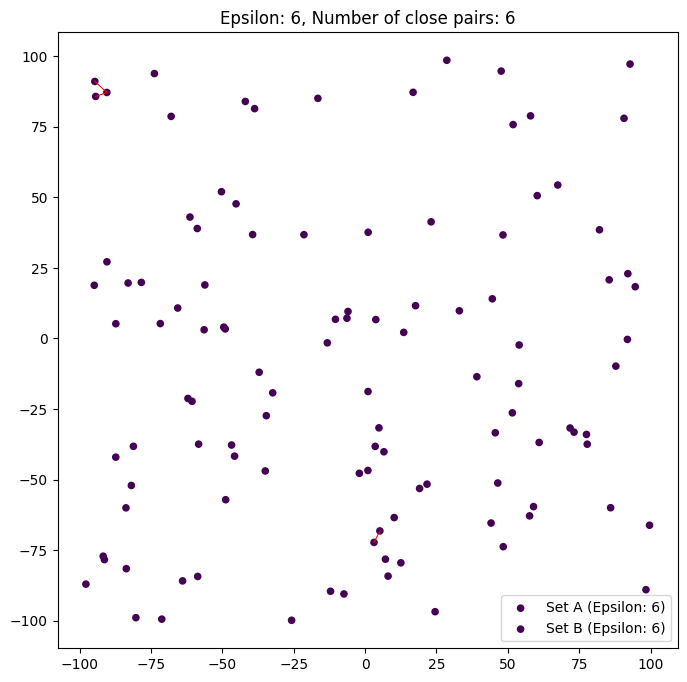

Epsilon: 6, Number of close pairs: 6
Pair: (-94.69787931408149, 91.09275171712406) <--> (-90.47937023883598, 87.19432816383045)
Pair: (-94.40883976159103, 85.78621092484781) <--> (-90.47937023883598, 87.19432816383045)
Pair: (3.112405389694999, -72.26528003614798) <--> (5.162051741011624, -68.20253722678373)
Pair: (-94.69787931408149, 91.09275171712406) <--> (-90.47937023883598, 87.19432816383045)
Pair: (-94.40883976159103, 85.78621092484781) <--> (-90.47937023883598, 87.19432816383045)
Pair: (3.112405389694999, -72.26528003614798) <--> (5.162051741011624, -68.20253722678373)


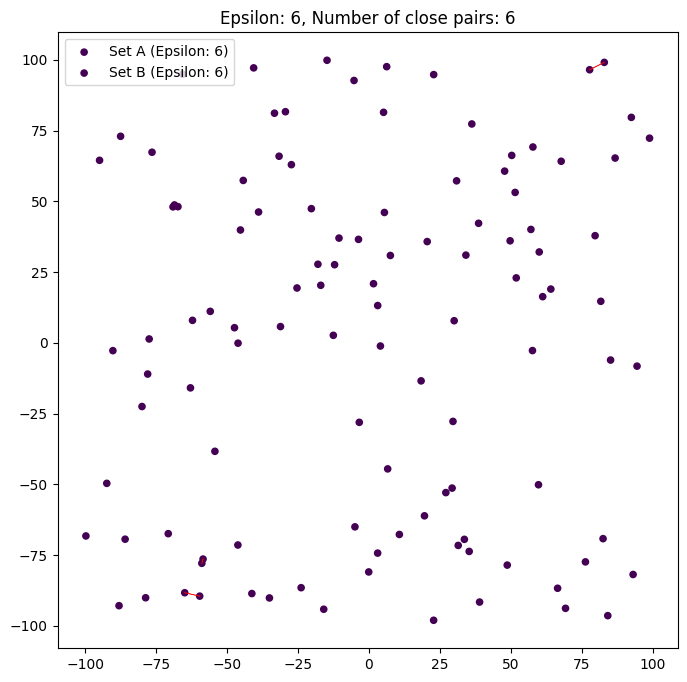

Epsilon: 6, Number of close pairs: 6
Pair: (-59.67456055538087, -89.52411325024063) <--> (-64.95543967902165, -88.32677565757332)
Pair: (77.80730944108035, 96.49127317107781) <--> (82.98062288422332, 99.09927879899735)
Pair: (-58.92375454041392, -77.91992092982673) <--> (-58.488665490816125, -76.42463244584572)
Pair: (-59.67456055538087, -89.52411325024063) <--> (-64.95543967902165, -88.32677565757332)
Pair: (77.80730944108035, 96.49127317107781) <--> (82.98062288422332, 99.09927879899735)
Pair: (-58.92375454041392, -77.91992092982673) <--> (-58.488665490816125, -76.42463244584572)


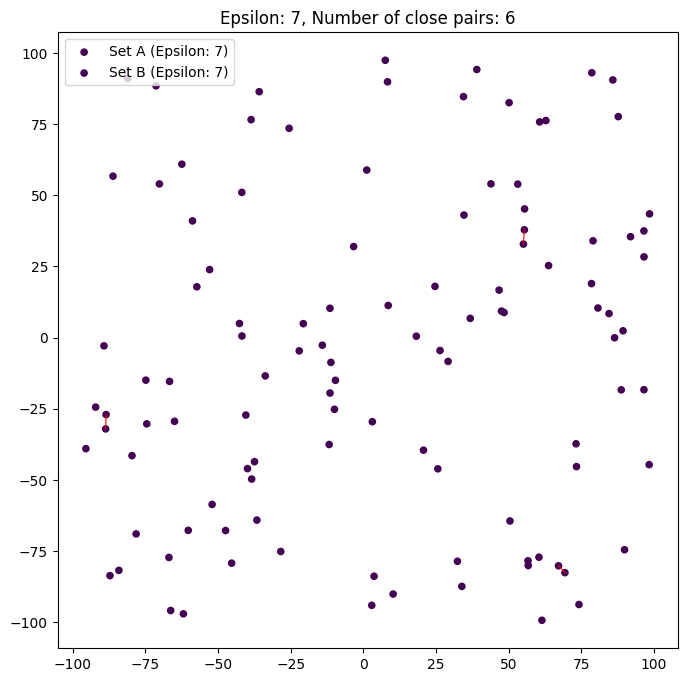

Epsilon: 7, Number of close pairs: 6
Pair: (-88.53829948650716, -27.033091736154333) <--> (-88.68640902402463, -32.059711271978614)
Pair: (69.35853303653005, -82.5674117804835) <--> (67.15136651758641, -80.15805657717931)
Pair: (55.41005960485407, 37.881865300777434) <--> (55.07225999777731, 32.8564362112391)
Pair: (-88.53829948650716, -27.033091736154333) <--> (-88.68640902402463, -32.059711271978614)
Pair: (69.35853303653005, -82.5674117804835) <--> (67.15136651758641, -80.15805657717931)
Pair: (55.41005960485407, 37.881865300777434) <--> (55.07225999777731, 32.8564362112391)


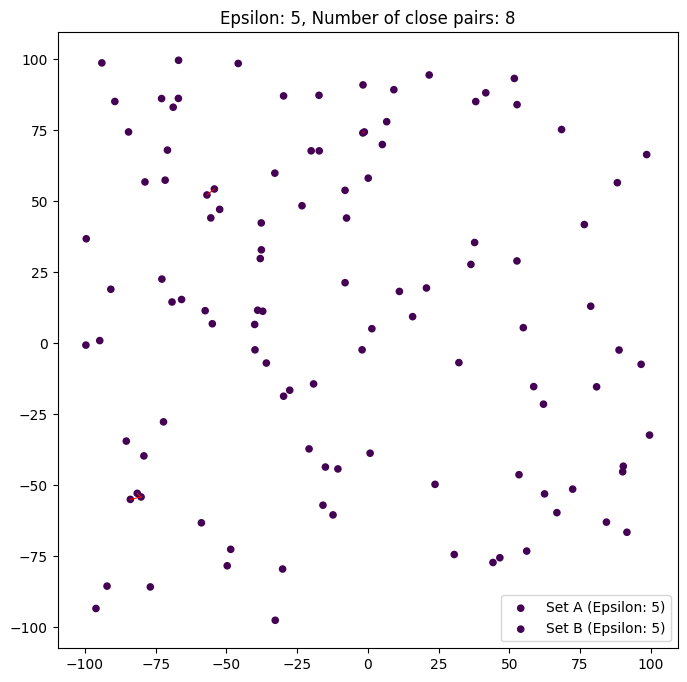

Epsilon: 5, Number of close pairs: 8
Pair: (-56.8758496529572, 52.20567240806943) <--> (-54.24595884702861, 54.31352438921192)
Pair: (-81.52314945934675, -52.913566902818054) <--> (-80.16344404726382, -54.179910352429)
Pair: (-83.9540881125339, -55.04452178705898) <--> (-80.16344404726382, -54.179910352429)
Pair: (-1.7631227102577753, 74.05431580685223) <--> (-1.2334297105204683, 74.40745441482551)
Pair: (-56.8758496529572, 52.20567240806943) <--> (-54.24595884702861, 54.31352438921192)
Pair: (-81.52314945934675, -52.913566902818054) <--> (-80.16344404726382, -54.179910352429)
Pair: (-83.9540881125339, -55.04452178705898) <--> (-80.16344404726382, -54.179910352429)
Pair: (-1.7631227102577753, 74.05431580685223) <--> (-1.2334297105204683, 74.40745441482551)


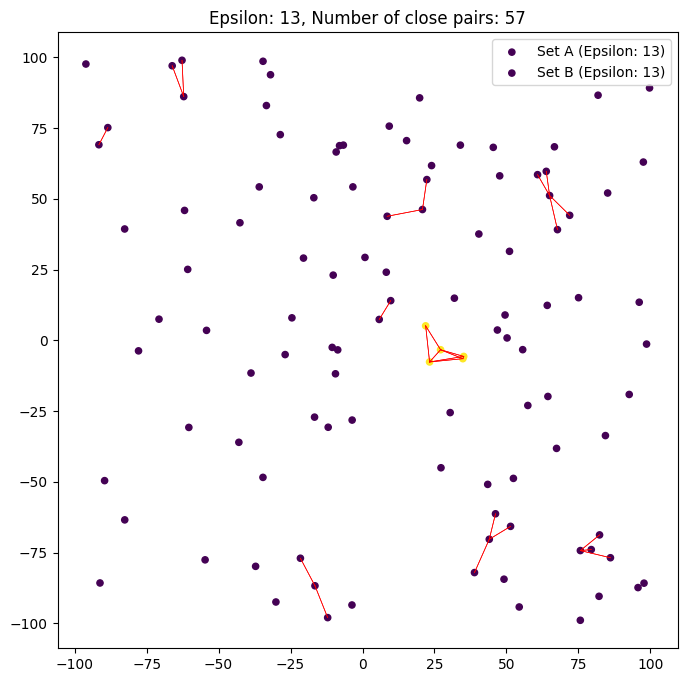

Epsilon: 13, Number of close pairs: 57
Pair: (27.11562353860208, -3.3322716490310427) <--> (27.11562353860208, -3.3322716490310427)
Pair: (27.11562353860208, -3.3322716490310427) <--> (21.93188351446065, 5.109877570039984)
Pair: (27.11562353860208, -3.3322716490310427) <--> (34.85646912687827, -6.491342995597876)
Pair: (27.11562353860208, -3.3322716490310427) <--> (35.15060449354746, -5.694086627899992)
Pair: (27.11562353860208, -3.3322716490310427) <--> (23.299034790988387, -7.6483874203273245)
Pair: (21.93188351446065, 5.109877570039984) <--> (27.11562353860208, -3.3322716490310427)
Pair: (21.93188351446065, 5.109877570039984) <--> (21.93188351446065, 5.109877570039984)
Pair: (21.93188351446065, 5.109877570039984) <--> (23.299034790988387, -7.6483874203273245)
Pair: (34.85646912687827, -6.491342995597876) <--> (27.11562353860208, -3.3322716490310427)
Pair: (34.85646912687827, -6.491342995597876) <--> (34.85646912687827, -6.491342995597876)
Pair: (34.85646912687827, -6.491342995597876

In [38]:
 # Sample input for performance
m = 100
n = 10
min_samples = 5
for _ in range(10):
    epsilon = random.randint(5, 15)
    set_a, set_b = generate_points(m, n)
    close_pairs,labels_a, labels_b = find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples)
    fig, ax = plt.subplots(figsize=(8, 8))
    
  
    ax.scatter([p[0] for p in set_a], [p[1] for p in set_a], c=[labels_a[i] for i in range(len(set_a))], s=20, label=f"Set A (Epsilon: {epsilon})")
    
   
    ax.scatter([p[0] for p in set_b], [p[1] for p in set_b], c=[labels_b[i] for i in range(len(set_b))], s=20, label=f"Set B (Epsilon: {epsilon})")
    
    
    for pair in close_pairs:
        ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='r', linewidth=0.5)
    
    ax.set_title(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    ax.legend()
    plt.show()
    print(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    for pair in close_pairs:
        print(f"Pair: {pair[0]} <--> {pair[1]}")